In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


load the dataset

In [151]:
df=pd.read_csv("weather.csv")

In [152]:
df1=df.copy()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6600 non-null   int64  
 1   Temperature           6600 non-null   float64
 2   Humidity              6600 non-null   int64  
 3   Wind Speed            6600 non-null   float64
 4   Precipitation (%)     6600 non-null   float64
 5   Cloud Cover           6600 non-null   object 
 6   Atmospheric Pressure  6600 non-null   float64
 7   UV Index              6600 non-null   int64  
 8   Season                6600 non-null   object 
 9   Visibility (km)       6600 non-null   float64
 10  Location              6600 non-null   object 
 11  Weather Type          6600 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 618.9+ KB


Data Exploration

In [154]:
df.isnull().sum()

Unnamed: 0              0
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [155]:
df.drop_duplicates()

,Unnamed: 0,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
2,3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
3,4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
4,9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
6595,13190,30.0,24,3.5,16.0,partly cloudy,1017.54,11,Summer,6.5,mountain,Sunny
6596,13191,27.0,48,6.5,14.0,clear,1029.37,8,Summer,8.0,inland,Sunny
6597,13192,31.0,24,8.0,5.0,clear,1029.61,8,Summer,9.0,inland,Sunny
6598,13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy


In [156]:
df.head()

,Unnamed: 0,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
2,3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
3,4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
4,9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


Check target variable is balanced or imbalanced

In [157]:
df['Weather Type'].value_counts()

Weather Type
Rainy    3300
Sunny    3300
Name: count, dtype: int64

Remove unneccesery columns

In [158]:
df.drop(columns=['Unnamed: 0'],inplace=True)

Check for outliers

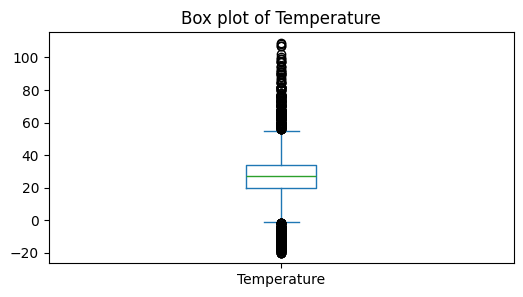

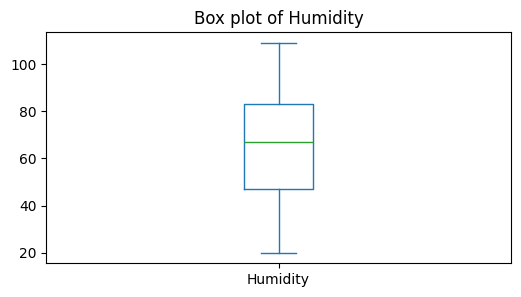

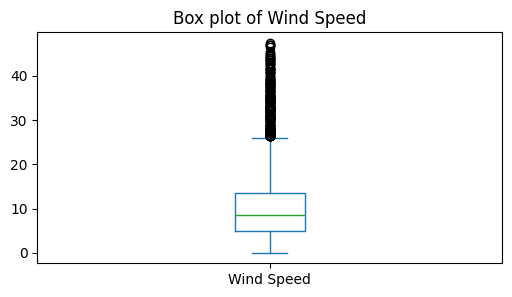

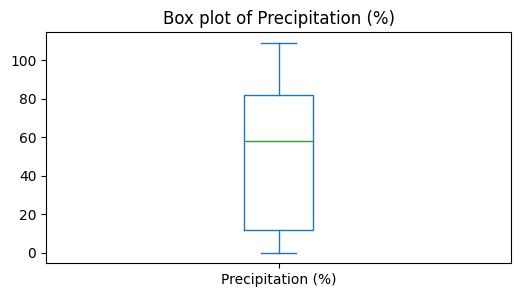

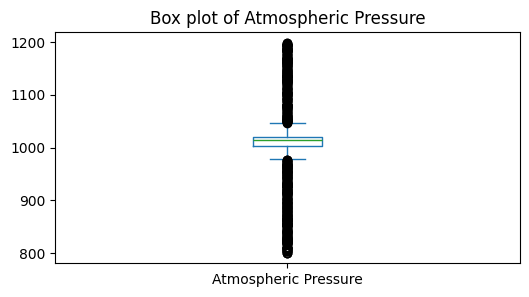

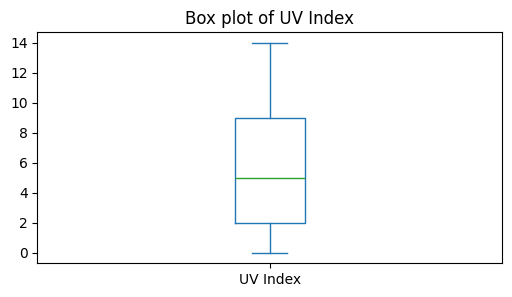

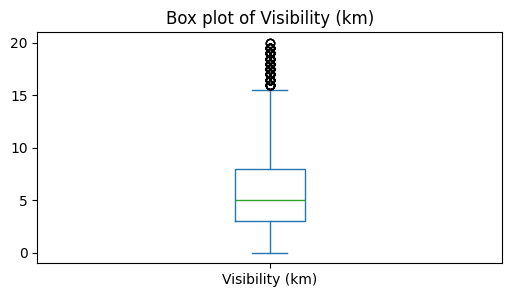

In [159]:
num_columns=df.select_dtypes(exclude='object').columns
def check_outlier(df):
        for col in num_columns:
         plt.figure(figsize=(6,3))
         df[col].plot(kind='box')
         plt.title(f'Box plot of {col}')
         plt.show()

check_outlier(df)

Treat Outliers

In [160]:
outlier_columns=['Temperature', 'Wind Speed','Atmospheric Pressure', 'Visibility (km)']

In [161]:
def fix_outlier(df):
    for col in outlier_columns:
        df[col].describe()
        Q1=df[col].describe()['25%']
        Q3=df[col].describe()['75%']
        IQR=Q3-Q1

        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)

        df[col]=df[col].clip(lower_limit,upper_limit)

In [162]:
fix_outlier(df)

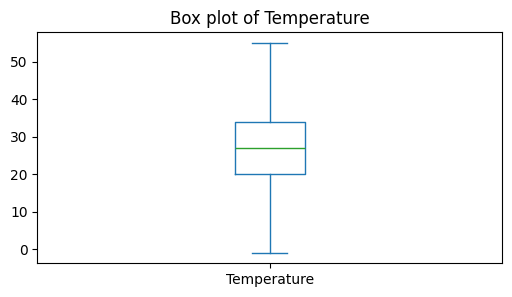

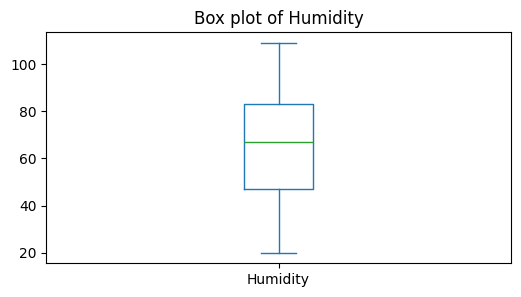

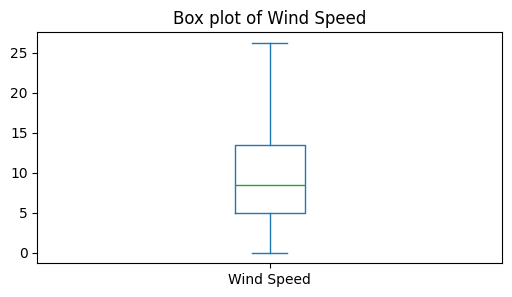

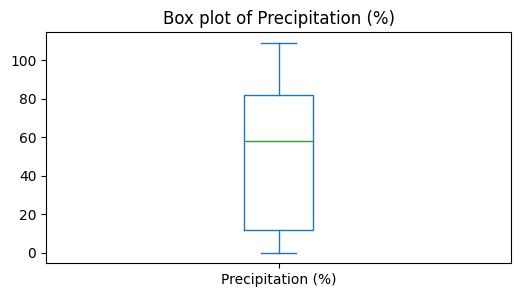

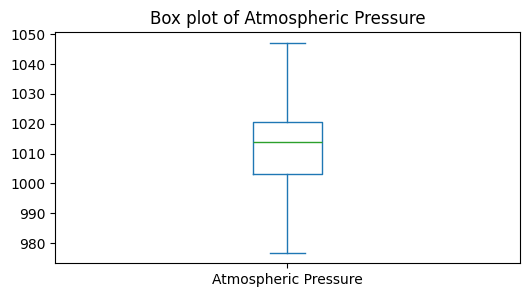

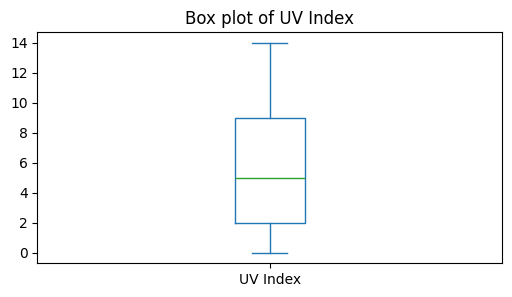

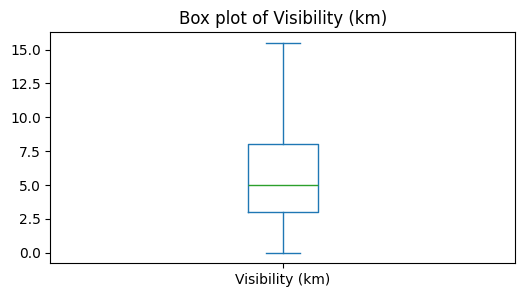

In [163]:
check_outlier(df)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           6600 non-null   float64
 1   Humidity              6600 non-null   int64  
 2   Wind Speed            6600 non-null   float64
 3   Precipitation (%)     6600 non-null   float64
 4   Cloud Cover           6600 non-null   object 
 5   Atmospheric Pressure  6600 non-null   float64
 6   UV Index              6600 non-null   int64  
 7   Season                6600 non-null   object 
 8   Visibility (km)       6600 non-null   float64
 9   Location              6600 non-null   object 
 10  Weather Type          6600 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 567.3+ KB


In [165]:
cat_columns=df.select_dtypes(include='object')

In [166]:
def cat_values(df):
    for col in cat_columns:
        print(df[col].value_counts())
        print()


In [167]:
cat_values(df)

Cloud Cover
overcast         2296
clear            2139
partly cloudy    1953
cloudy            212
Name: count, dtype: int64

Season
Spring    1668
Summer    1661
Winter    1646
Autumn    1625
Name: count, dtype: int64

Location
coastal     2345
inland      2134
mountain    2121
Name: count, dtype: int64

Weather Type
Rainy    3300
Sunny    3300
Name: count, dtype: int64



Encoding

In [168]:
df=pd.get_dummies(df,columns=['Cloud Cover','Season','Location'],drop_first=True, dtype=np.int64)

In [169]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,0,0,1,0,0,1,1,0
1,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,0,0,0,1,0,0,0,1
2,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,0,0,0,1,0,0,0,0
3,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,0,1,0,0,0,1,0,1
4,28.0,74,8.5,107.0,1012.13,8,7.5,Sunny,0,0,0,0,0,1,0,0


# Split the dataset to train the model

In [170]:
X= df.drop(columns=['Weather Type'])
y = df['Weather Type']

In [171]:
# split the data into 80 and 20 ration
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


# Train the Model

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [209]:
import os
print(os.getenv("API_KEY"))

None


# Evaluate the Model

In [173]:
y_pred1=dt.predict(X_test)

In [174]:
int(accuracy_score(y_test,y_pred1)*100)

94

In [175]:
confusion_matrix(y_test,y_pred1)

array([[613,  34],
       [ 42, 631]])

Random Forest Model

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)

,n_estimators,250
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [177]:
y_pred2 = rf.predict(X_test)

In [178]:
int(accuracy_score(y_test,y_pred2)*100)

95

Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [180]:
y_pred3 = lr.predict(X_test)

In [181]:
int(accuracy_score(y_test,y_pred3)*100)

93

In [182]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [183]:
y_pred4 =  kn.predict(X_test)

In [184]:
int(accuracy_score(y_test,y_pred4)*100)

93

In [185]:
accuracy=[94,95,93,93]
model_name=['Decision tree classifier','Random Forest Classifier','Logistic Regression','KNeighbors lassifier']
df_result=pd.DataFrame(accuracy,columns=['Accuracy_score'],index=models)
print(df_result)

                          Accuracy_score
Decision tree classifier              94
Random Forest Classifier              95
Logistic Regression                   93
KNeighbors lassifier                  93


In this notebook, we explored a weather dataset, performed exploratory data analysis, and built a predictive model for apparent temperature. Achieved model accuracies of 93–95%, with the Random Forest Classifier performing best at 95% accuracy.

# Gradio Application

In [206]:
def prediction(Temperature, Humidity, Wind_Speed, Precipitation, Cloud_Cover,
               Atmospheric_Pressure, UV_Index, Season, Visibility, Location):
    inputs_df = pd.DataFrame([[
        Temperature, Humidity, Wind_Speed, Precipitation, Cloud_Cover,
        Atmospheric_Pressure, UV_Index, Season, Visibility, Location
    ]],
    columns=[
        'Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Cloud_Cover',
        'Atmospheric_Pressure', 'UV_Index', 'Season', 'Visibility', 'Location'
    ])
    
    output = dt.predict(inputs_df)
    return output[0]


In [208]:
dt.prediction(14.0,73,9.5,82.0,'partly cloudy',1010.82,2,'winter',3.5,'inland')

AttributeError: 'DecisionTreeClassifier' object has no attribute 'prediction'

In [ ]:
  Humidity              6600 non-null   int64  
 2   Wind Speed            6600 non-null   float64
 3   Precipitation (%)     6600 non-null   float64
 4   Cloud Cover           6600 non-null   object 
 5   Atmospheric Pressure  6600 non-null   float64
 6   UV Index              6600 non-null   int64  
 7   Season                6600 non-null   object 
 8   Visibility (km)       6600 non-null   float64
 9   Location              6600 non-null   object 
 10  Weather Type 